EDA

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
import nltk
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Load the data
df = pd.read_csv('/content/news_share_data (1).csv')

In [ ]:
# Exploratory data analysis
# Describe the data
print(df.describe())

         article_id  unique_tokens_rate    num_hrefs     num_imgs  \
count  1.003000e+03         1003.000000  1003.000000  1003.000000   
mean   6.915159e+06            0.526890    11.720837     5.188435   
std    4.823885e+05            0.118793    15.181597     8.495002   
min    2.195051e+06            0.000000     0.000000     0.000000   
25%    7.006102e+06            0.466751     4.000000     1.000000   
50%    7.013065e+06            0.533118     8.000000     2.000000   
75%    7.027570e+06            0.596615    14.000000     7.000000   
max    7.041291e+06            0.867925   162.000000    84.000000   

        num_videos  average_token_length  num_keywords  min_avg_key  \
count  1003.000000           1003.000000   1003.000000  1003.000000   
mean      1.215354              4.603757      7.206381  1131.437972   
std       4.079730              0.701756      1.856713  1181.134621   
min       0.000000              0.000000      2.000000     0.000000   
25%       0.000000     

In [ ]:
df.head()

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,data_channel_binary,shares_log
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,3/31/2014 0:00,0.640816,5,3,1,4.579592,5,...,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,0,7.378384
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,4/1/2014 0:00,0.549618,4,1,0,4.636704,7,...,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,0,7.313887
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,4/1/2014 0:00,0.577236,8,1,0,4.627451,7,...,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,0,7.244942
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,4/1/2014 0:00,0.525896,4,1,0,5.083665,9,...,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,0,7.170888
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,4/1/2014 0:00,0.588889,6,9,0,4.336022,7,...,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,0,8.006701


In [ ]:
print(df.isnull().sum())

article_id                    0
title                         0
text                          0
published_date                0
unique_tokens_rate            0
num_hrefs                     0
num_imgs                      0
num_videos                    0
average_token_length          0
num_keywords                  0
data_channel                  0
min_avg_key                   0
max_avg_key                   0
avg_avg_key                   0
href_avg_shares               0
global_subjectivity           0
global_sentiment_polarity     0
global_rate_positive_words    0
global_rate_negative_words    0
title_subjectivity            0
title_sentiment_polarity      0
shares                        0
dtype: int64


In [ ]:
df['data_channel_binary'] = df['data_channel'].apply(lambda x: 1 if x == 'binary_value' else 0)

In [ ]:
df['shares_log'] = np.log1p(df['shares'])

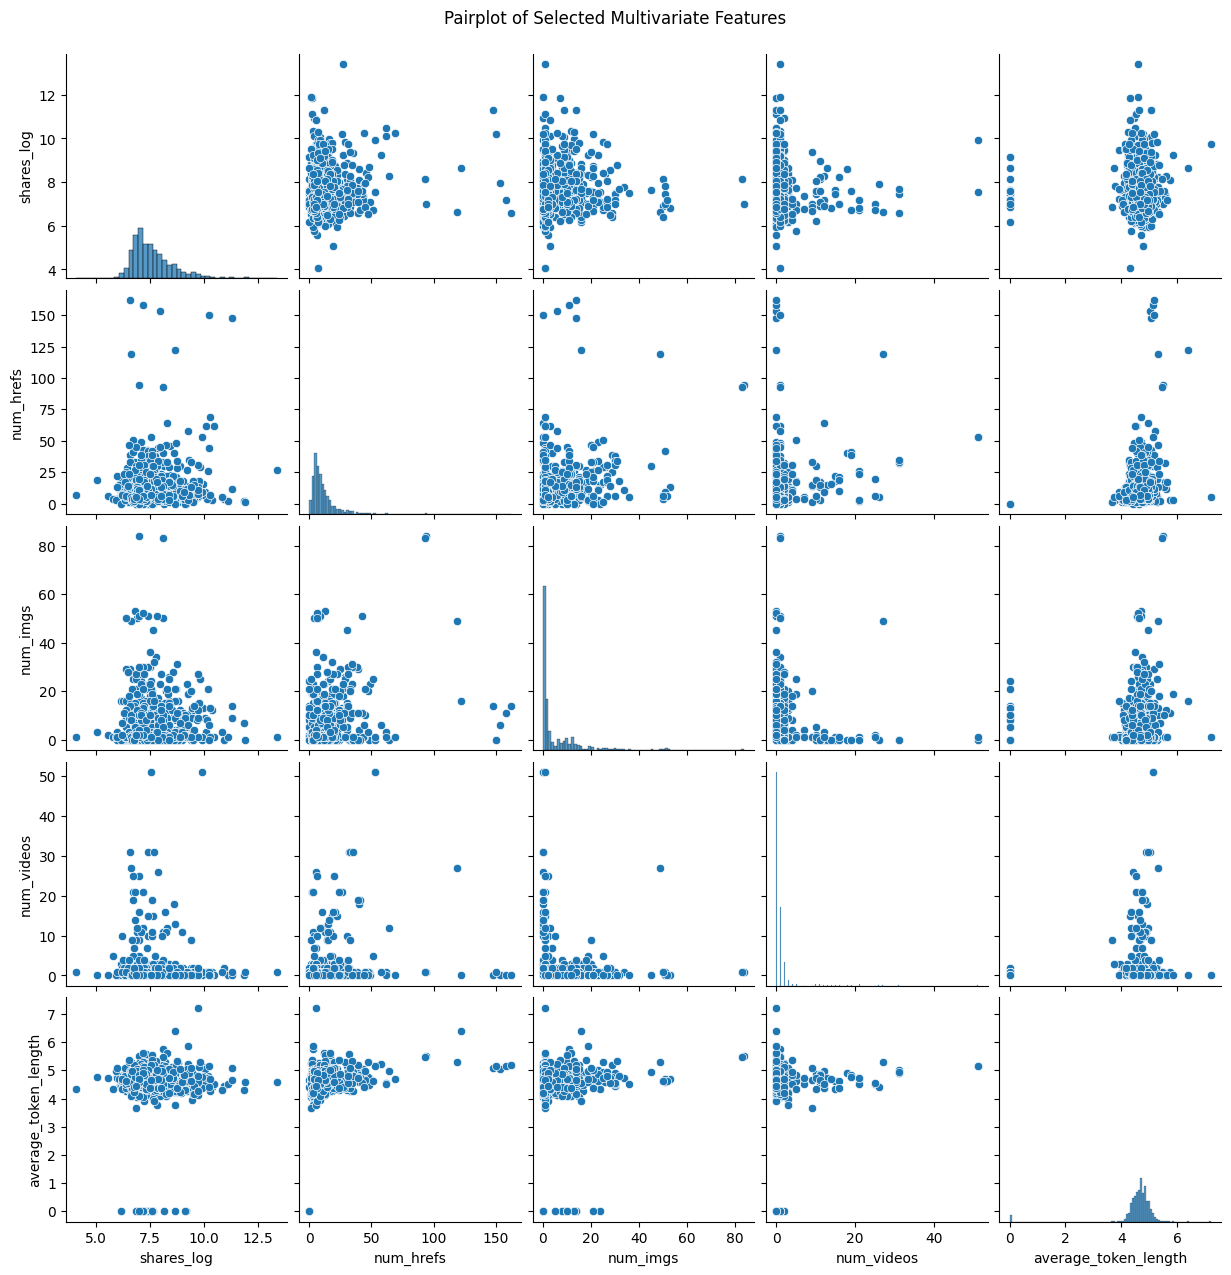

In [ ]:
selected_multivariate_features = ['shares_log', 'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length']
sns.pairplot(df[selected_multivariate_features])
plt.suptitle('Pairplot of Selected Multivariate Features', y=1.02)
plt.show()

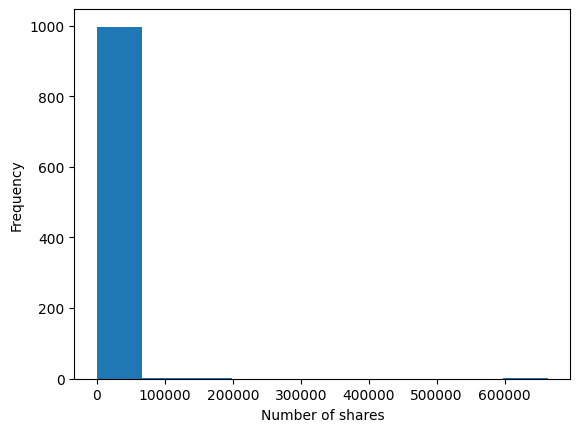

In [ ]:
# Visualize the data
# Create a histogram of the number of shares
plt.hist(df['shares'])
plt.xlabel('Number of shares')
plt.ylabel('Frequency')
plt.show()


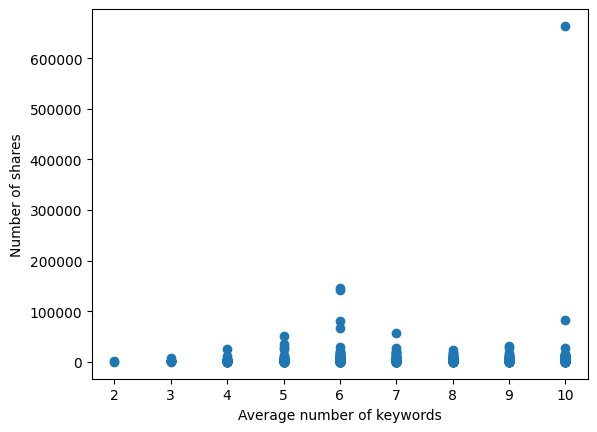

In [ ]:
# Create a scatter plot of the number of shares and the average number of keywords
plt.scatter(df['num_keywords'], df['shares'])
plt.xlabel('Average number of keywords')
plt.ylabel('Number of shares')
plt.show()

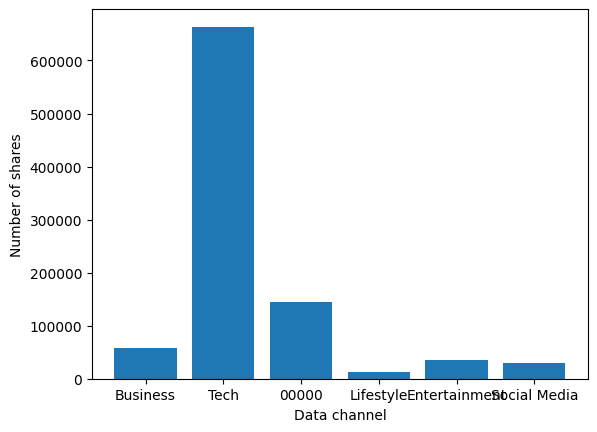

In [ ]:
# Create a bar chart of the number of shares by data channel
plt.bar(df['data_channel'], df['shares'])
plt.xlabel('Data channel')
plt.ylabel('Number of shares')
plt.show()

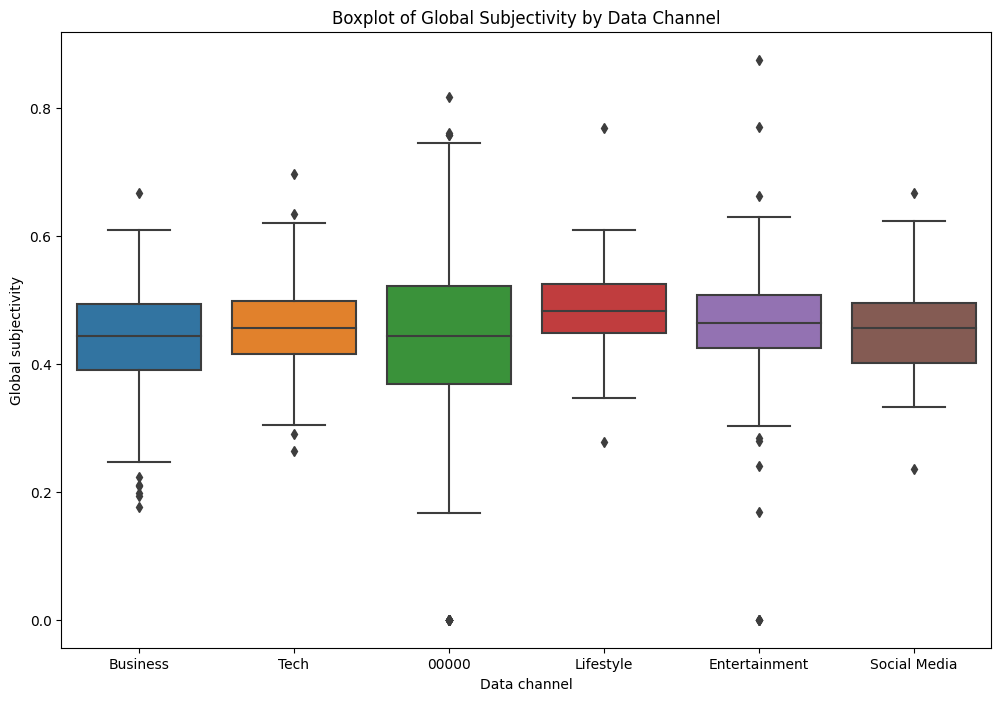

In [ ]:
# Create a box plot of the number of shares by global subjectivity
# Create a box plot of the global subjectivity grouped by data channel
plt.figure(figsize=(12, 8))
sns.boxplot(x='data_channel', y='global_subjectivity', data=df)
plt.xlabel('Data channel')
plt.ylabel('Global subjectivity')
plt.title('Boxplot of Global Subjectivity by Data Channel')
plt.show()

<ipython-input-13-47cd8f0eee91>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.imshow(df.corr())


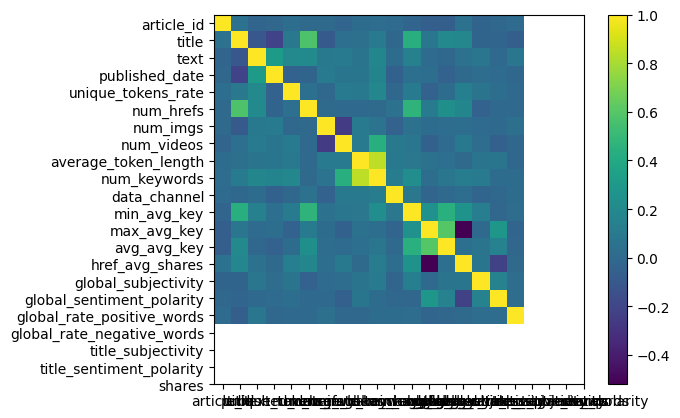

In [ ]:
# Create a heatmap of the correlation between the features
plt.imshow(df.corr())
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.show()

# **Feature Engineering **



In [26]:
import pandas as pd
from datetime import datetime
import nltk

# Assuming 'published_date' is in datetime format
df['published_date'] = pd.to_datetime(df['published_date'])

# Extracting weekday
df['weekday'] = df['published_date'].dt.weekday

# Creating a binary feature for weekend
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

# Tokenizing title and content
nltk.download('punkt')  # Download the punkt tokenizer if not already downloaded

df['title_tokens'] = df['title'].apply(lambda x: len(nltk.word_tokenize(str(x))))
df['content_tokens'] = df['text'].apply(lambda x: len(nltk.word_tokenize(str(x))))

# Display the first few rows to verify the new features
print("\nFirst Few Rows with New Features:")
print(df[['published_date', 'weekday', 'is_weekend', 'title_tokens', 'content_tokens']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



First Few Rows with New Features:
  published_date  weekday  is_weekend  title_tokens  content_tokens
0     2014-03-31        0           0             7             195
1     2014-04-01        1           0            12             108
2     2014-04-01        1           0            15             512
3     2014-04-01        1           0             6             283
4     2014-04-01        1           0            10             282


## **using nltk**

In [35]:
import pandas as pd
from datetime import datetime
import nltk
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('/content/news_share_data (1).csv')

# Feature engineering: Handling categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data_channel = encoder.fit_transform(df[['data_channel']])
unique_values = df['data_channel'].unique()
encoded_columns = [f'data_channel_{value}' for value in unique_values[1:]]
encoded_data_channel = pd.DataFrame(data=encoded_data_channel, columns=encoded_columns)
df = pd.concat([df, encoded_data_channel], axis=1)
df.drop(['data_channel'], axis=1, inplace=True)


# Feature engineering: Extracting date-related features
df['published_date'] = pd.to_datetime(df['published_date'])
df['weekday'] = df['published_date'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)
df['month'] = df['published_date'].dt.month
df['year'] = df['published_date'].dt.year

# Feature engineering: Tokenizing text
nltk.download('punkt')
df['title_tokens'] = df['title'].apply(lambda x: len(nltk.word_tokenize(str(x))))
df['content_tokens'] = df['text'].apply(lambda x: len(nltk.word_tokenize(str(x))))

# Feature engineering: Creating binary features
df['is_high_shares'] = (df['shares'] > df['shares'].mean()).astype(int)

# Display the first few rows to verify the new features
print("\nFirst Few Rows with New Features:")
print(df[['published_date', 'weekday', 'is_weekend', 'month', 'year', 'title_tokens', 'content_tokens', 'is_high_shares']].head())

# Save the processed data to a new CSV file
df.to_csv('processed_data_with_features.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



First Few Rows with New Features:
  published_date  weekday  is_weekend  month  year  title_tokens  \
0     2014-03-31        0           0      3  2014             7   
1     2014-04-01        1           0      4  2014            12   
2     2014-04-01        1           0      4  2014            15   
3     2014-04-01        1           0      4  2014             6   
4     2014-04-01        1           0      4  2014            10   

   content_tokens  is_high_shares  
0             195               0  
1             108               0  
2             512               0  
3             283               0  
4             282               0  


## **make model data**

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming 'target_column' is the column you want to predict (e.g., 'shares')
target_column = 'shares'

# Extract features (X) and target variable (y)
X = df.drop([target_column], axis=1)
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Create a preprocessor that applies transformers to the respective feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_scaled = preprocessor.transform(X_test)




In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already prepared

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2134878351.2304878
R-squared: 0.018855818092226695


## Using linear Regression, decision tree, random forest model

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already prepared

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_predictions = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Cross-validated R-squared scores
linear_cv_r2 = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='r2').mean()
dt_cv_r2 = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring='r2').mean()
rf_cv_r2 = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2').mean()

# Print the results
print("Linear Regression:")
print(f'Mean Squared Error: {linear_mse}')
print(f'R-squared: {linear_r2}')
print(f'Cross-validated R-squared: {linear_cv_r2}\n')

print("Decision Tree Regressor:")
print(f'Mean Squared Error: {dt_mse}')
print(f'R-squared: {dt_r2}')
print(f'Cross-validated R-squared: {dt_cv_r2}\n')

print("Random Forest Regressor:")
print(f'Mean Squared Error: {rf_mse}')
print(f'R-squared: {rf_r2}')
print(f'Cross-validated R-squared: {rf_cv_r2}')


Linear Regression:
Mean Squared Error: 2134878351.2304878
R-squared: 0.018855818092226695
Cross-validated R-squared: 0.06234862224902258

Decision Tree Regressor:
Mean Squared Error: 2135436431.4577115
R-squared: 0.0185993364207242
Cross-validated R-squared: 0.16355068745553353

Random Forest Regressor:
Mean Squared Error: 2155227136.3538566
R-squared: 0.009503954028788453
Cross-validated R-squared: 0.2740991149757905


## Best model

In [40]:
# Comparison
best_model = max([(linear_r2, "Linear Regression"), (dt_r2, "Decision Tree Regressor"), (rf_r2, "Random Forest Regressor")])
print(f"The best model is: {best_model[1]}")
print(f'R-squared of the best model: {best_model[0]}')

The best model is: Linear Regression
R-squared of the best model: 0.018855818092226695
